MSSV: 19520954

Tên: Lê Thị Thanh Thanh

# Các thư viện cần thiết

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Dữ liệu iris (lấy 2 features sau)

In [8]:
iris = load_iris()
X = iris.data[:, 2:5]
y = iris.target
dataset = pd.DataFrame(data=np.concatenate((X, y.reshape(-1,1)),axis=1),columns=['petal length','petal width','target'])

In [9]:
dataset.tail()

,petal length,petal width,target
145,5.2,2.3,2.0
146,5.0,1.9,2.0
147,5.2,2.0,2.0
148,5.4,2.3,2.0
149,5.1,1.8,2.0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

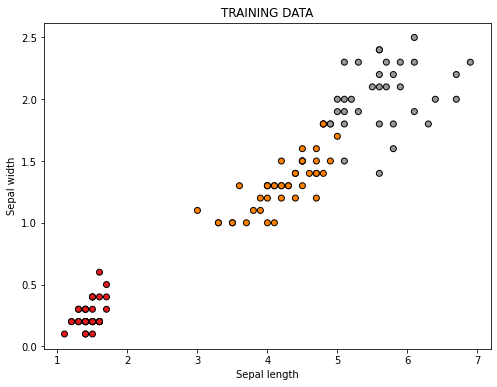

In [12]:
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor="k")
plt.title('TRAINING DATA')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

# Softmax Regression

In [13]:
i = tf.keras.layers.Input(shape=(2))
X = tf.keras.layers.Dense(3,activation='softmax')(i)
model = tf.keras.models.Model(i,X)

In [14]:
model.compile(optimizer='sgd', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 3)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(X_train, y_train.reshape(-1), epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 3ms/step - loss: 4.2844 - accuracy: 0.3583
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 3.9335 - accuracy: 0.3583
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 3.5940 - accuracy: 0.3583
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 3.2659 - accuracy: 0.3583
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 2.9454 - accuracy: 0.3583
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 2.6385 - accuracy: 0.3583
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 2.3443 - accuracy: 0.3583
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 2.0664 - accuracy: 0.3583
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 1.8156 - accuracy: 0.3583
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 1.5922 - accuracy: 0.3583
Epoch 11/200
4/4 [===========

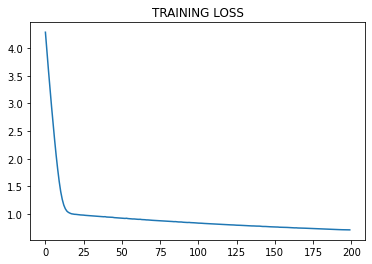

In [17]:
plt.plot(history.history['loss'])
plt.title('TRAINING LOSS')
plt.show()

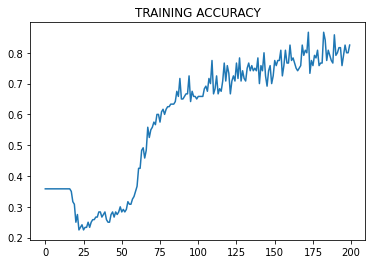

In [18]:
plt.plot(history.history['accuracy'])
plt.title('TRAINING ACCURACY')
plt.show()

In [19]:
y_predict = np.argmax(model.predict(X_test), axis=1)

In [20]:
print(y_test)

[2 2 2 2 1 0 2 2 2 1 0 0 2 2 0 1 0 1 1 0 1 2 2 2 0 1 0 2 2 0]


In [21]:
print(y_predict)

[2 2 2 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 1 2 2 2 0 2 0 2 2 0]


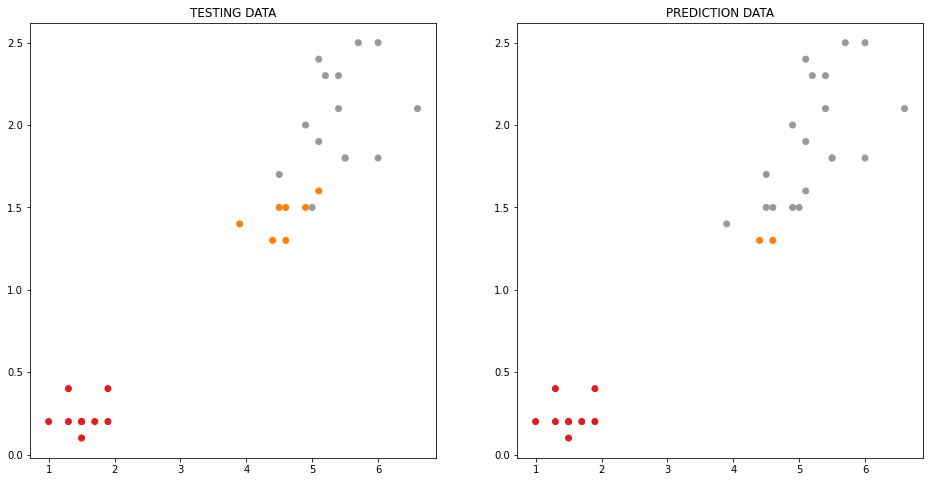

In [22]:
_, (test_ax, predict_ax) = plt.subplots(ncols=2, figsize=(16, 8))
# Plot the testing points
test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Set1)
test_ax.set_title('TESTING DATA')

# Plot the prediction points
predict_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_predict, cmap=plt.cm.Set1)
_ = predict_ax.set_title('PREDICTION DATA')